In [5]:
!pip install -q geopandas

     |████████████████████████████████| 1.0 MB 7.8 MB/s 
     |████████████████████████████████| 6.3 MB 49.1 MB/s 
     |████████████████████████████████| 16.7 MB 38.8 MB/s 


In [6]:
import geopandas as gpd
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive', True) #montando a unidade do google drive | #mounting google drive

Mounted at /content/drive


In [50]:
database_path = "/content/drive/MyDrive/Colab Notebooks/2. SINAN - Nacional/1.1 Base de dados/limites/lim_unidade_federacao_a.shp"

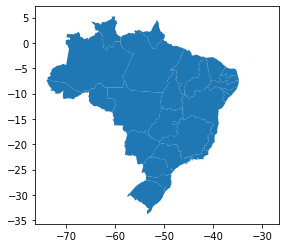

In [51]:
map_df = gpd.read_file(database_path)
map_df.plot()

In [48]:
map_df.head()

,nome,nomeabrev,geometriaa,sigla,geocodigo,id_produto,id_element,geometry
0,Bahia,Bahia,Não,BA,29,250014.0,None,"MULTIPOLYGON (((-38.71080 -17.96966, -38.70848..."
1,Pará,None,None,PA,15,NaN,None,"MULTIPOLYGON (((-46.45928 -0.90961, -46.45936 ..."
2,Rio de Janeiro,None,None,RJ,33,250000.0,None,"MULTIPOLYGON (((-43.55929 -23.08050, -43.55938..."
3,São Paulo,None,None,SP,35,250000.0,None,"MULTIPOLYGON (((-45.13777 -23.79018, -45.13777..."
4,Espírito Santo,None,None,ES,32,250000.0,None,"MULTIPOLYGON (((-28.85365 -20.47547, -28.85372..."


In [53]:
df_casos_ano_uf = "/content/drive/MyDrive/Colab Notebooks/2. SINAN - Nacional/1.1 Base de dados/casesbyuf.csv"
df = pd.read_csv(df_casos_ano_uf, sep=";")



sum_column = df["Number of CURED cases"] + df["Number of DIED cases"]
df["Number of TOTAL cases"] = sum_column


df.shape

(27, 4)

In [54]:
df.head()

,Federative Unit (State),Number of CURED cases,Number of DIED cases,Number of TOTAL cases
0,AC,6259,130,6389
1,AL,16597,867,17464
2,AM,37965,1522,39487
3,AP,3149,61,3210
4,BA,78902,2568,81470


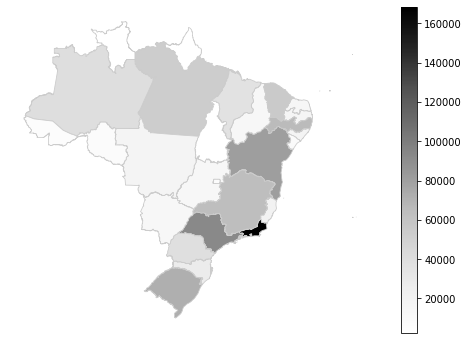

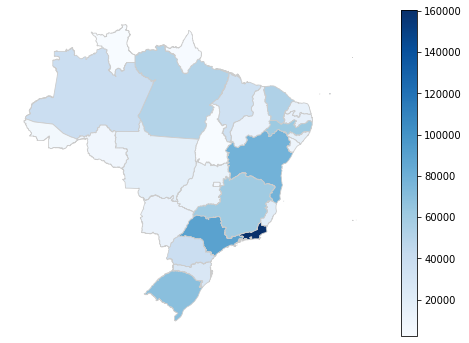

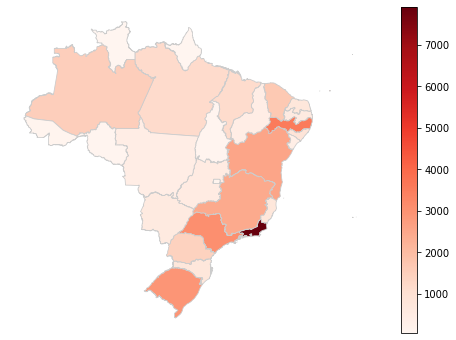

In [55]:






merged = map_df.set_index('sigla').join(df.set_index('Federative Unit (State)'))
merged.head()



vmin=df['Number of TOTAL cases'].min()
vmax=df['Number of TOTAL cases'].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
merged.plot(column='Number of TOTAL cases', cmap='Greys', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)


vmin=df['Number of CURED cases'].min()
vmax=df['Number of CURED cases'].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
merged.plot(column='Number of CURED cases', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)
#fig.savefig(f'/home/ubuntu/Geracao_profiling/Mapas/dengue/dengue{ano}.jpg' , dpi=300)

vmin=df['Number of DIED cases'].min()
vmax=df['Number of DIED cases'].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
merged.plot(column='Number of DIED cases', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

